# Assignment-03
## < Linear Regression >
#### -20154521 Seokjun Choi
1. Input points
    - Load a set of data points from given csv file.
    - Store # of points to use later.

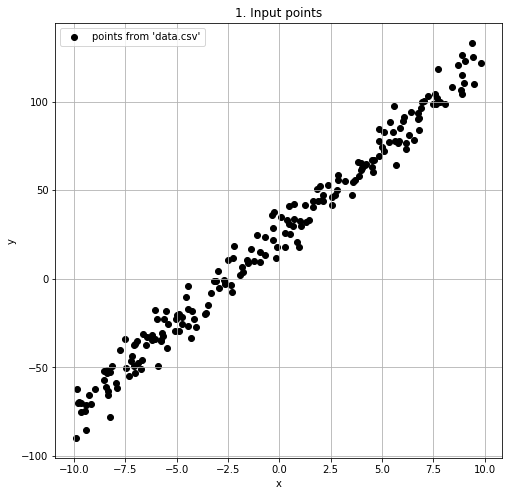

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

m = len(x_data)

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('1. Input points')
plt.legend(['points from \'data.csv\''])
plt.grid()
plt.show()


2. Objective function
    - Use sympy library to formulate energy equation $J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1 x_i - y_i)^2$.
    - Take the partial derivative with respect to $\theta_0$, and $\theta_1$.<br>

In [2]:
from sympy import symbols, diff

theta_0 = symbols('theta_0')
theta_1 = symbols('theta_1')
sum = 0
for i in range(m):
    sum += (theta_0 + theta_1 * x_data[i] - y_data[i])**2
j_func = sum / (2*m)

partial0 = diff(j_func, theta_0) #partial derivative on theta0
partial1 = diff(j_func, theta_1) #partial derivative on theta1

3. Update the parameters(Gradient descent)
    - Set $\theta_0 = -30, \theta_1 = -30$, before we do linear regression.
    - The learning rate $\alpha$ is 0.01
    - Renew the parameters$(\theta_0, \theta_1)$ until the cost converge.
    - $temp 0 := \theta_0 - \alpha \frac{\partial}{\partial\theta_0}J(\theta_0, \theta_1)$<br>
    $temp 1 := \theta_1 - \alpha \frac{\partial}{\partial\theta_1}J(\theta_0, \theta_1)$<br>
    $\theta_0 := temp 0$<br>
    $\theta_1 := temp 1$<br>
    - Store values in lists to draw graph later.

In [3]:
thet0 = -30 #initial theta0
thet1 = -30 #initial theta1
theta0_list = list()
theta1_list = list()

j_value = list()
j_iter = list()
t = 1 #the number of iteration
learning_rate = 0.01
tempj = 0 #temporary value for check convergence

while True:
    if t>1 and abs(tempj - j_func.evalf(subs={theta_0: thet0, theta_1: thet1})) <= 0.001:
        #print("finish")
        break #if the enenrgy is conversing, break the loop.
    tempj = j_func.evalf(subs={theta_0: thet0, theta_1: thet1})
    
    j_value.append(tempj)
    j_iter.append(t)
    t += 1
    #print(t , tempj)
    
    theta0_list.append(thet0)
    theta1_list.append(thet1)
    temp0 = thet0 - learning_rate * partial0.evalf(subs={theta_0: thet0, theta_1: thet1})
    temp1 = thet1 - learning_rate * partial1.evalf(subs={theta_0: thet0, theta_1: thet1})
    thet0 = temp0
    thet1 = temp1
    #print(thet0, thet1)

4. Plot the result of linear regression
    - Plot a red line which is consist of $\theta_0, \theta_1$. 
    - $h_\theta(x) = \theta_0 + \theta_1  x$
    

24.5939803900488 9.92980945084396


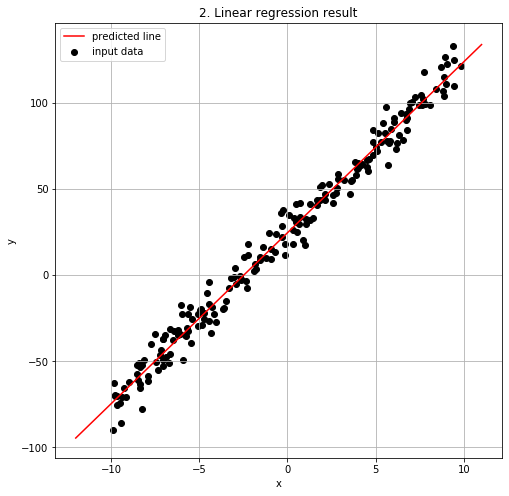

In [4]:
x_pred_line = [x1 for x1 in range(-12, 12)]
y_pred_line = [thet1 * y1 + thet0 for y1 in range(-12, 12)]

print(thet0, thet1)

plt.figure(figsize=(8, 8))
plt.plot(x_pred_line, y_pred_line, c = 'red')
plt.scatter(x_data, y_data, c = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2. Linear regression result')
plt.legend(['predicted line', 'input data'])
plt.grid()
plt.show()

5. Plot the energy surface
    - The domain is $\theta_0$ = [-30 : 0.1 : 30], and $\theta_1$ = [-30 : 0.1 : 30].
    - The energy axis means the certain energy value on certain condition $\theta_0$, and $\theta_1$

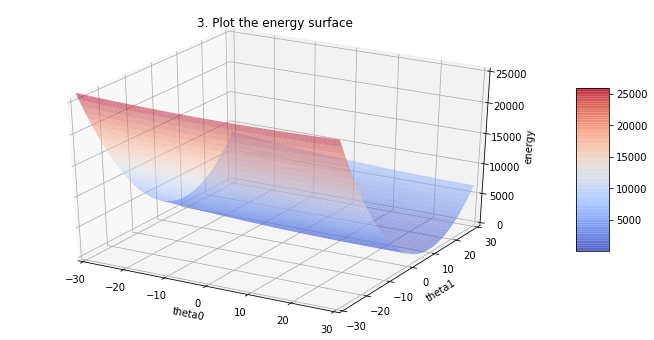

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

theta0_Domain = np.arange(-30,30,0.1)
theta1_Domain = np.arange(-30,30,0.1)
xs, ys = np.meshgrid(theta0_Domain, theta1_Domain)
zs = np.zeros((600,600))

for i in range(m):
    zs += (xs + ys*x_data[i] - y_data[i])**2

zs = zs / (2 * m)
    

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xs, ys, zs, rstride=10, cstride=10,alpha=0.5, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('theta0')
ax.set_xlim(-30, 30)
ax.set_ylabel('theta1')
ax.set_ylim(-30, 30)
ax.set_zlabel('energy')
ax.set_zlim(0, 25000)


plt.title('3. Plot the energy surface')
 
plt.show()

6. Plot the gradient descent path on the energy surface
    - The initial condition is $\theta_0 = -30,$ and $\theta_1 = -30$.
    - The gradient descent path is plotted by red.
    - The gradient descent path is superimposed on energy surface.

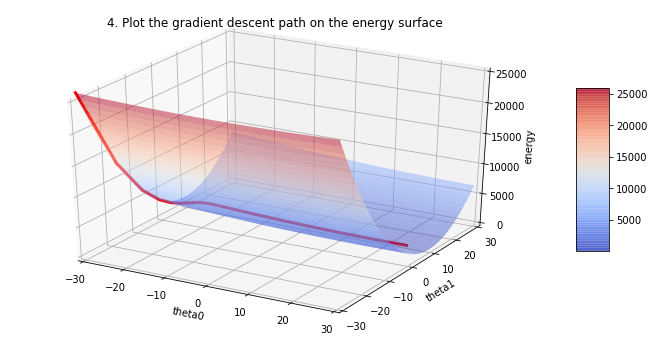

In [6]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xs, ys, zs, rstride=10, cstride=10,alpha=0.5, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)


surf = ax.plot(theta0_list, theta1_list, j_value, color='red', linewidth = 3.0)

ax.set_xlabel('theta0')
ax.set_xlim(-30, 30)
ax.set_ylabel('theta1')
ax.set_ylim(-30, 30)
ax.set_zlabel('energy')
ax.set_zlim(0, 25000)


plt.title('4. Plot the gradient descent path on the energy surface')
 
plt.show()